### Premier League Crawling

In [1]:
from selenium import webdriver

In [2]:
url = "https://1xbet.whoscored.com/Regions/252/Tournaments/2/England-Premier-League"
driver = webdriver.Chrome()
driver.get(url)

columns = driver.find_element_by_css_selector(".standings-18685-general-header").text.split(" ")
columns = columns[0].split("\n") + columns[1:]

table = []

table_df = pd.DataFrame(table, columns=columns)

for n in range(1, 21):
    title = driver.find_element_by_css_selector("#standings-18685-content > tr:nth-child({}) > td:nth-child(1)".format(n)).text
    data = driver.find_element_by_css_selector("#standings-18685-content > tr:nth-child({})".format(n)).text.replace(title, "").split(" ")[1:]

    if n < 10:
        title = title[1:]
    else:
        title = title[2:]
    
    table_df.loc[n] = [title] + data

driver.quit()    
    
table_df

,Team,P,W,D,L,GF,GA,GD,Pts,Form
1,Liverpool,7,5,1,1,17,15,+2,16,WWLDWW
2,Tottenham,7,4,2,1,18,9,+9,14,WDWDWW
3,Everton,7,4,1,2,15,11,+4,13,WWWDLL
4,Southampton,7,4,1,2,14,12,+2,13,LWWDWW
5,Wolverhampton Wanderers,7,4,1,2,8,8,0,13,LLWWDW
6,Chelsea,7,3,3,1,16,9,+7,12,LDWDDW
7,Aston Villa,6,4,0,2,15,9,+6,12,WWWWLL
8,Leicester,6,4,0,2,13,8,+5,12,WWWLLW
9,Arsenal,7,4,0,3,9,7,+2,12,WLWLLW
10,Manchester City,6,3,2,1,9,8,+1,11,WLDWDW


In [8]:
table_df.columns = ['team','played','win','draw','lose','goalfor','goalagst','goaldiff','points','form']
table_df.tail()

,team,played,win,draw,lose,goalfor,goalagst,goaldiff,points,form
16,Brighton,7,1,2,4,11,14,-3,5,WLLDDL
17,West Bromwich Albion,6,0,3,3,6,14,-8,3,LLDLDD
18,Sheffield United,7,0,1,6,3,10,-7,1,LLLDLL
19,Fulham,6,0,1,5,5,14,-9,1,LLLLDL
20,Burnley,6,0,1,5,3,12,-9,1,LLLDLL


In [9]:
table_df["goalfor"] = table_df["goalfor"].astype("int")
table_df["points"] = table_df["points"].astype("int")
table_df["goaldiff"] = table_df["goaldiff"].astype("int")

In [11]:
table_df.head()

,team,played,win,draw,lose,goalfor,goalagst,goaldiff,points,form
1,Liverpool,7,5,1,1,17,15,2,16,WWLDWW
2,Tottenham,7,4,2,1,18,9,9,14,WDWDWW
3,Everton,7,4,1,2,15,11,4,13,WWWDLL
4,Southampton,7,4,1,2,14,12,2,13,LWWDWW
5,Wolverhampton Wanderers,7,4,1,2,8,8,0,13,LLWWDW


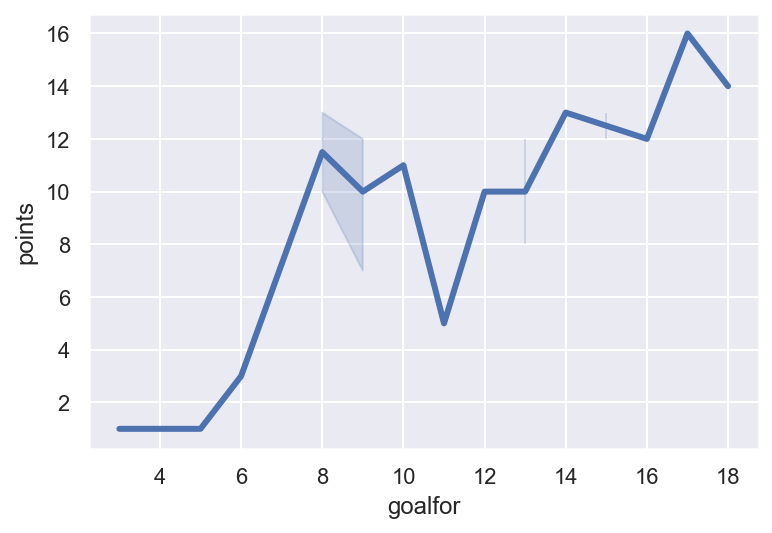

In [12]:
sns.lineplot(data=table_df, x = 'goalfor', y = 'points', palette="tab10", linewidth=3)

In [13]:
table_df.to_csv("table.csv", sep = ",")